### Zadanie: PCA
Dodaj PCA do problemu klasyfikacji i regresji z poprzednich modułów. Wynik przedstaw Mentorowi.

In [53]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [54]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [55]:
penguins.dropna(inplace=True)

In [56]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [57]:
penguins['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

In [58]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [59]:
pd.Series(y).value_counts(normalize=True)

0    0.441520
1    0.359649
2    0.198830
Name: Species, dtype: float64

In [60]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 164


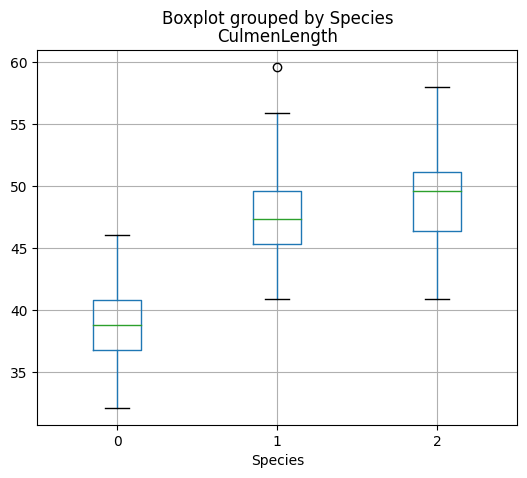

Unique values: 80


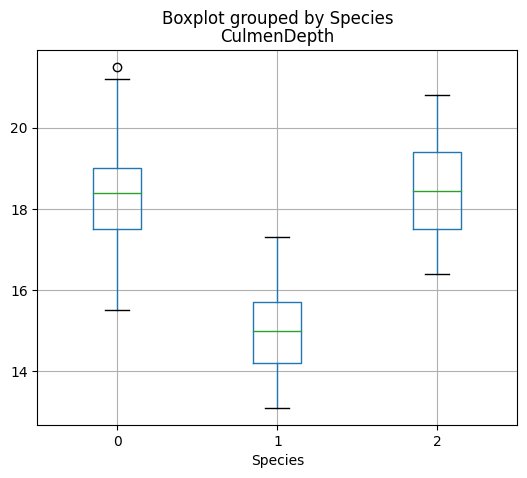

Unique values: 55


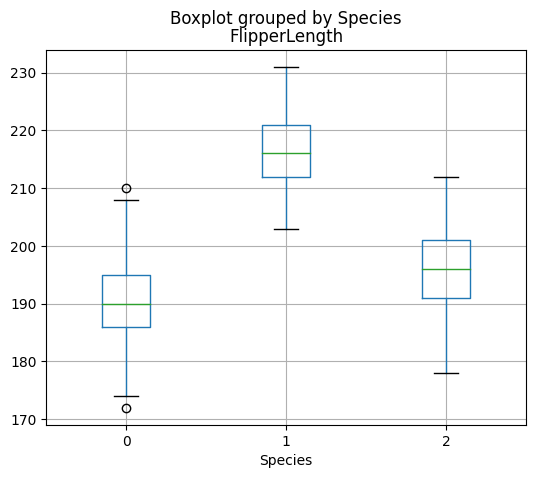

Unique values: 94


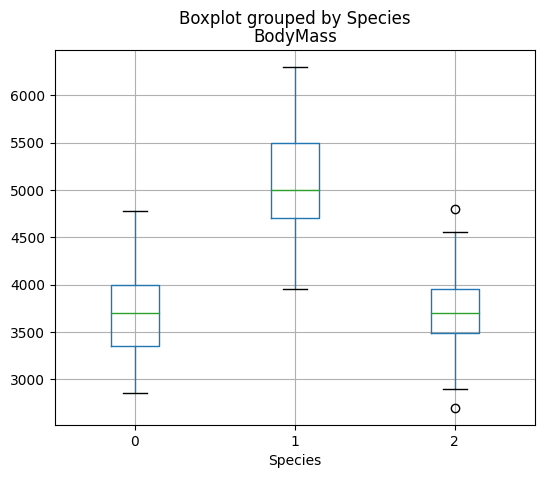

In [61]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

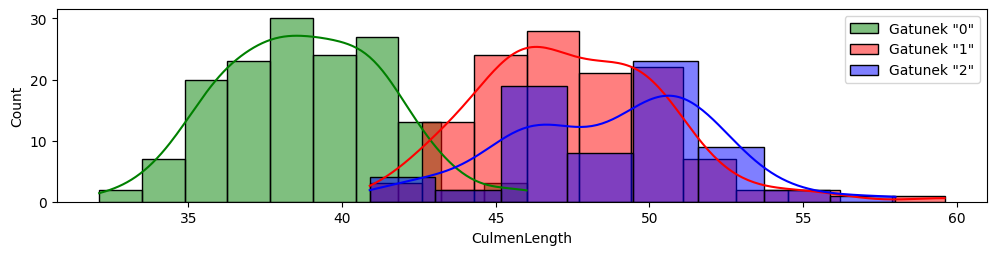

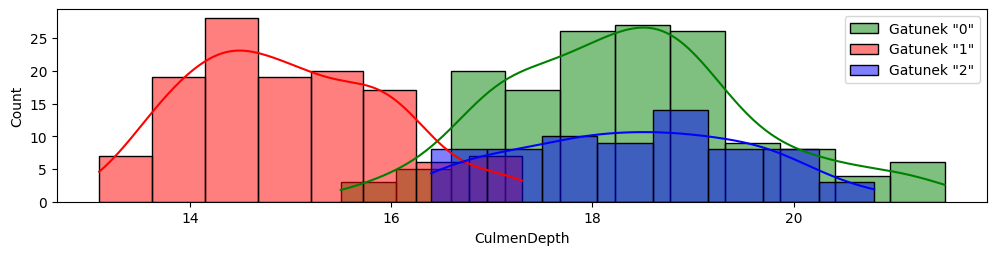

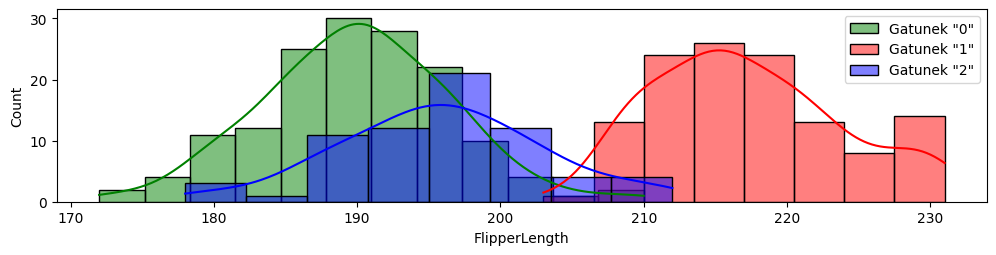

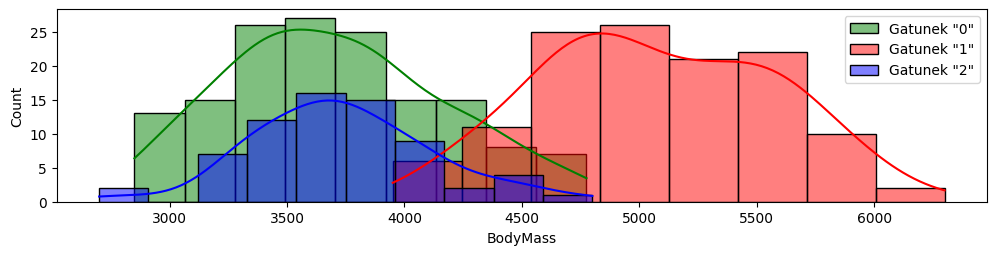

In [62]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Gatunek "0"')
    sns.histplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Gatunek "1"')
    sns.histplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Gatunek "2"')
    plt.legend(loc='upper right')
    plt.show()

In [63]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

### WIzualizacja

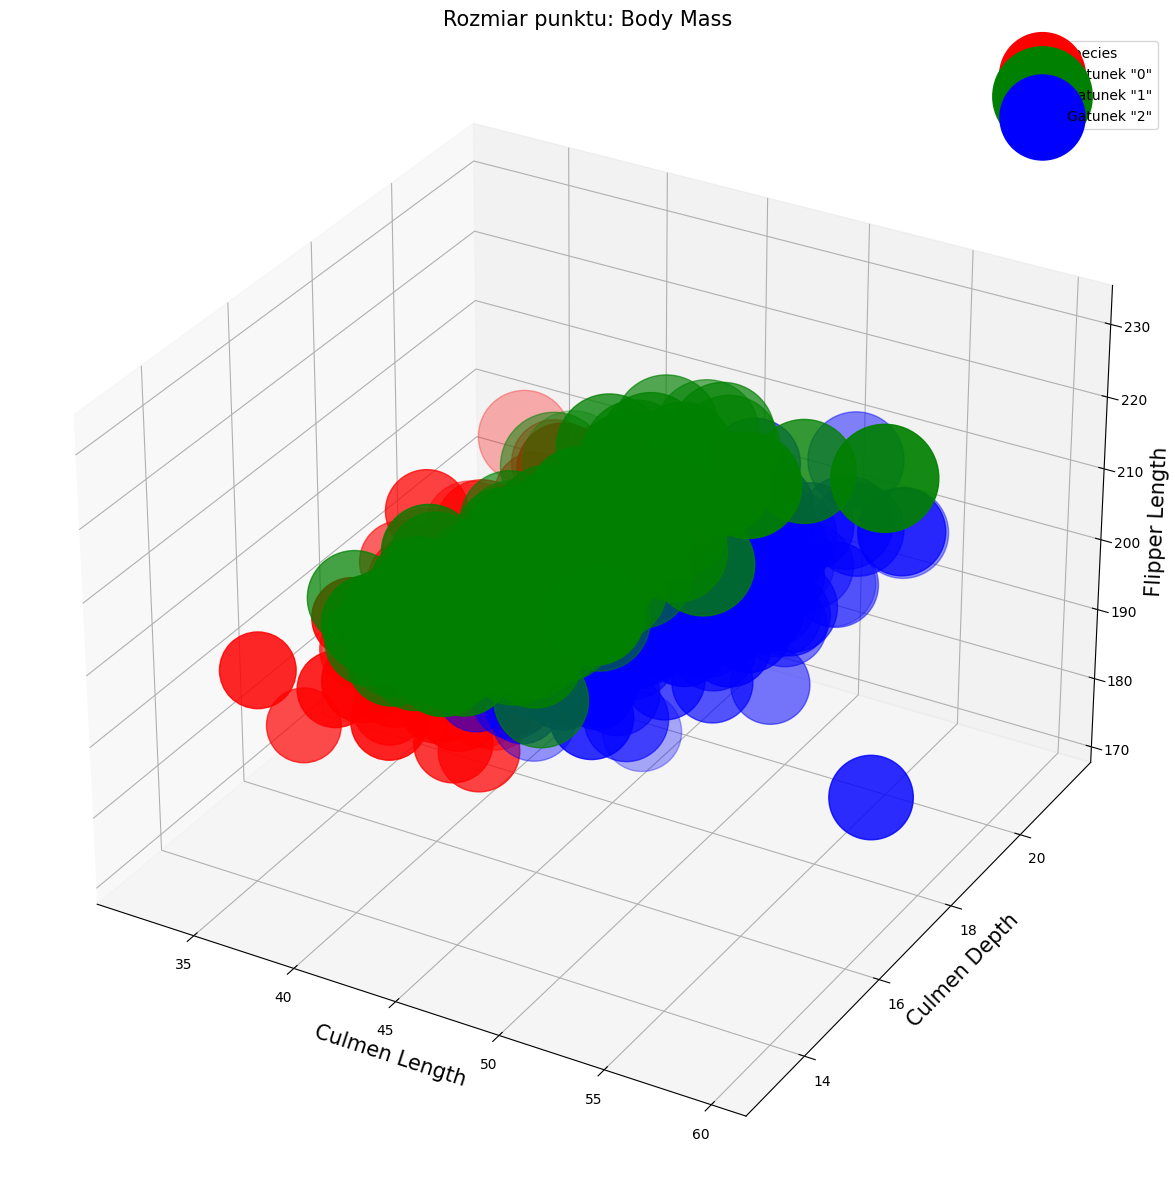

In [64]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguins.loc[penguins['Species']==0, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==0,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==0, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==0,'BodyMass'],
                 c='red', label='Gatunek "0"')
img = ax.scatter(xs=penguins.loc[penguins['Species']==1, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==1,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==1, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==1,'BodyMass'],
                 c='green', label='Gatunek "1"')
img = ax.scatter(xs=penguins.loc[penguins['Species']==2, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==2,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==2, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==2,'BodyMass'],
                 c='blue', label='Gatunek "2"')
ax.set_xlabel(xlabel='Culmen Length', size=15)
ax.set_ylabel(ylabel='Culmen Depth', size=15)
ax.set_zlabel(zlabel='Flipper Length', size=15)
ax.set_title('Rozmiar punktu: Body Mass', size=15)
plt.legend(title='Species')
plt.show()

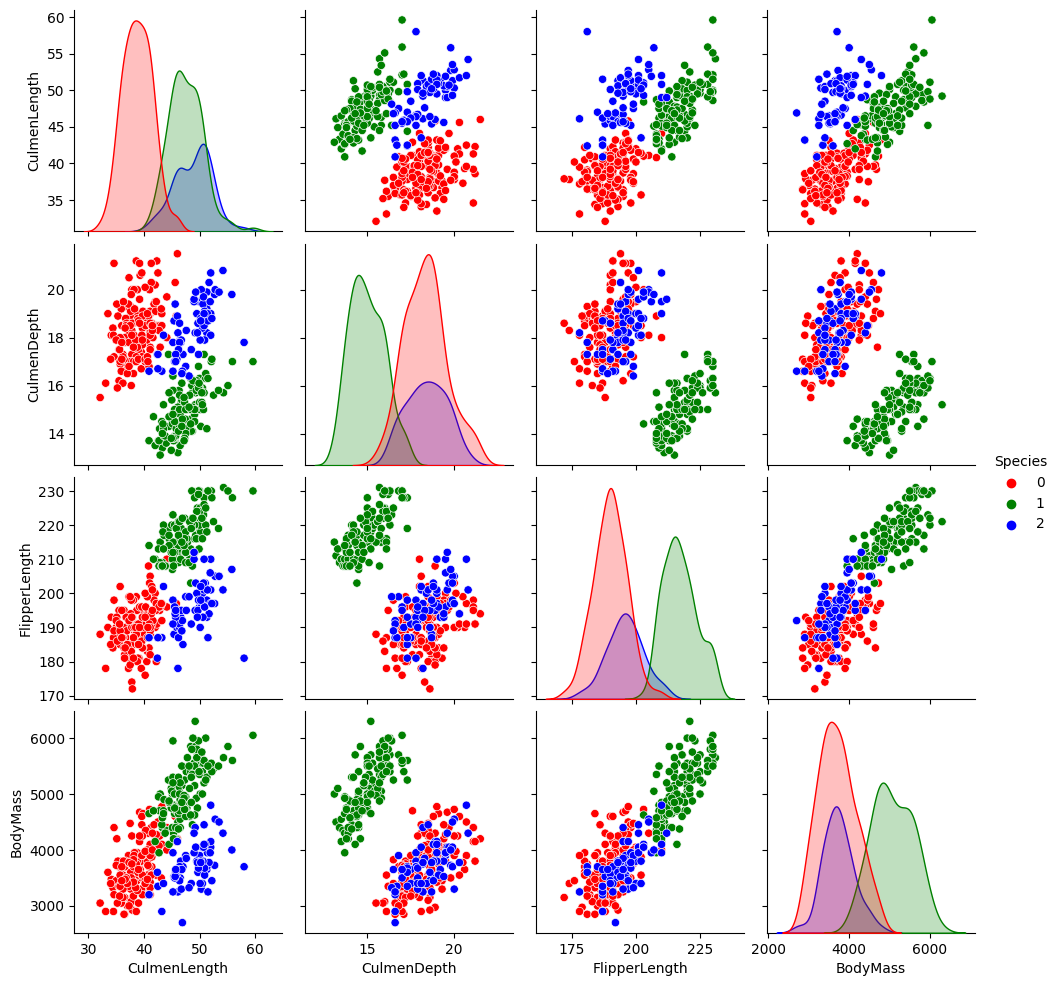

In [65]:
sns.pairplot(penguins,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

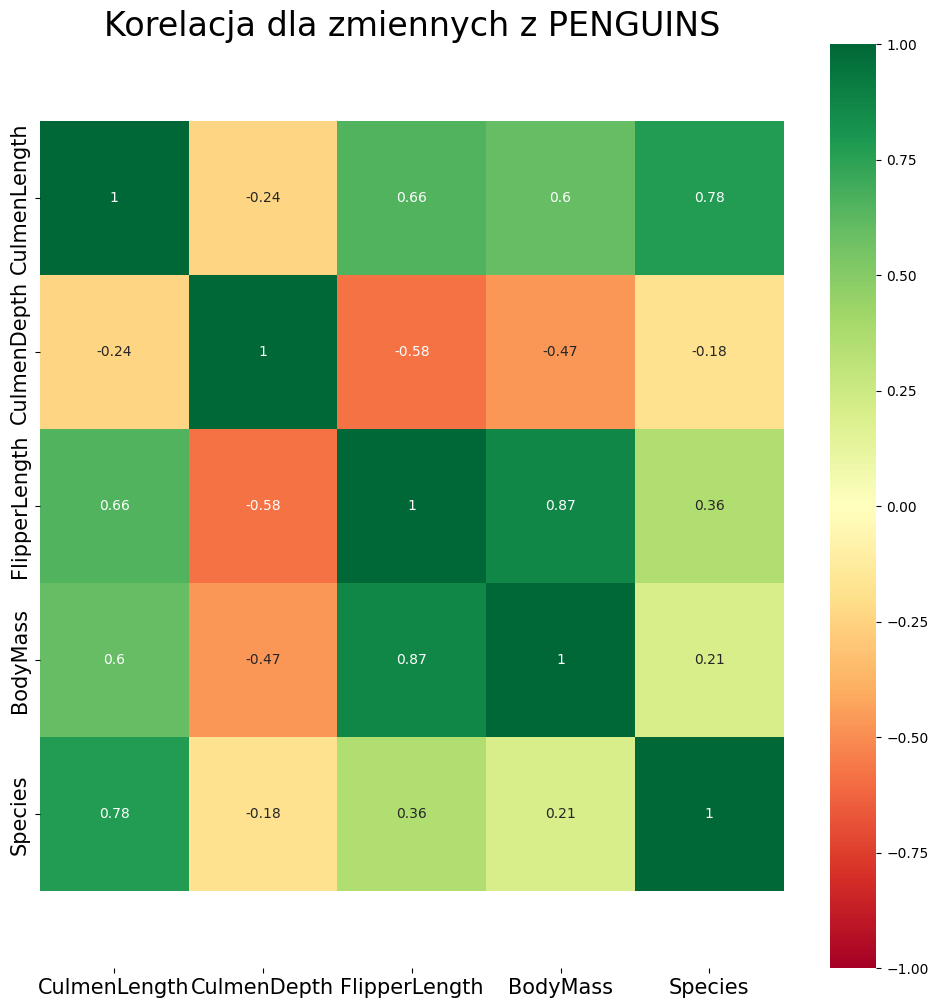

In [66]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(penguins.corr(),
                 xticklabels=penguins.corr().columns,
                 yticklabels=penguins.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z PENGUINS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = penguins.drop('Species', axis=1).copy()
y = penguins['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguins = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguins.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguins[['PC1', 'PC2','PC3','PC4']] = train_penguins[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguins.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,4.973308e-17,2.509932e-16,-6.186377e-18,0.426933
PC2,4.973308e-17,1.000000e+00,-3.172435e-17,-1.113583e-16,0.365677
PC3,2.509932e-16,-3.172435e-17,1.000000e+00,2.027349e-16,0.626119
PC4,-6.186377e-18,-1.113583e-16,2.027349e-16,1.000000e+00,-0.028837
Species,4.269326e-01,3.656773e-01,6.261193e-01,-2.883655e-02,1.000000


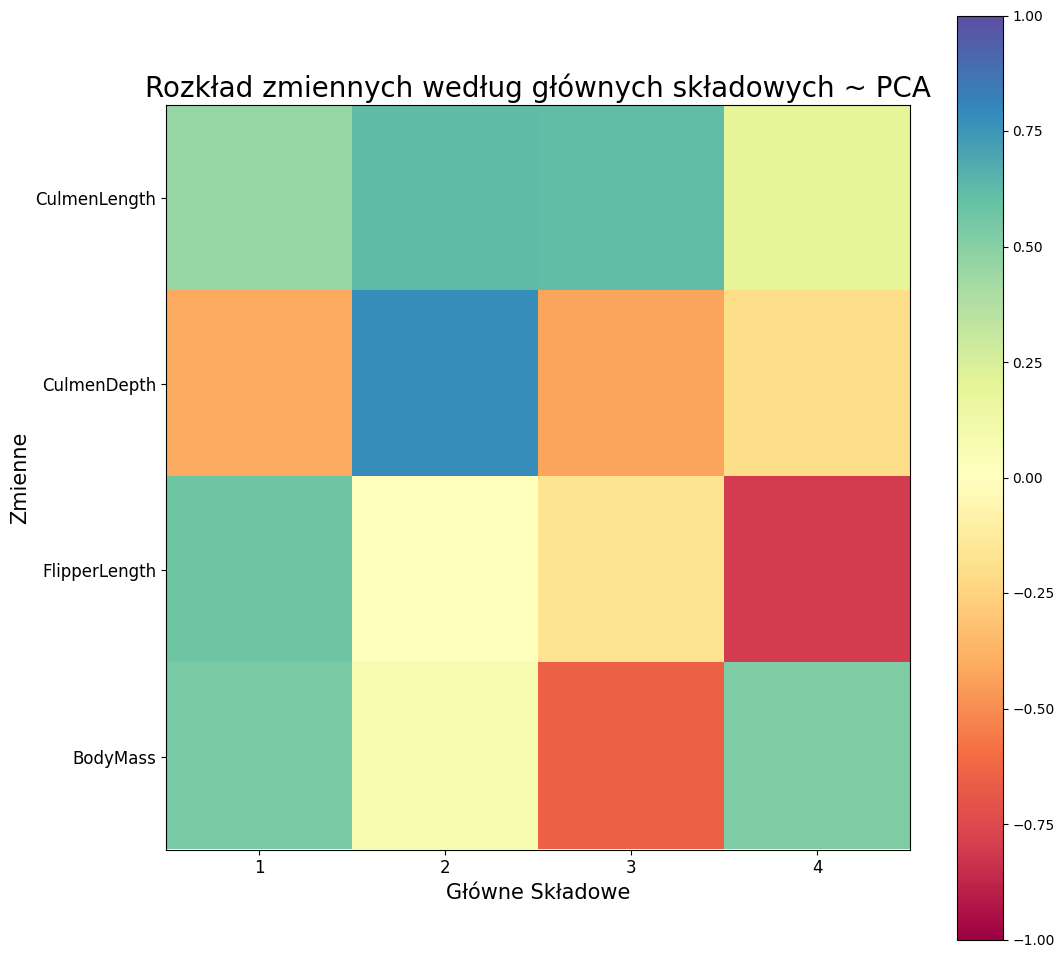

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

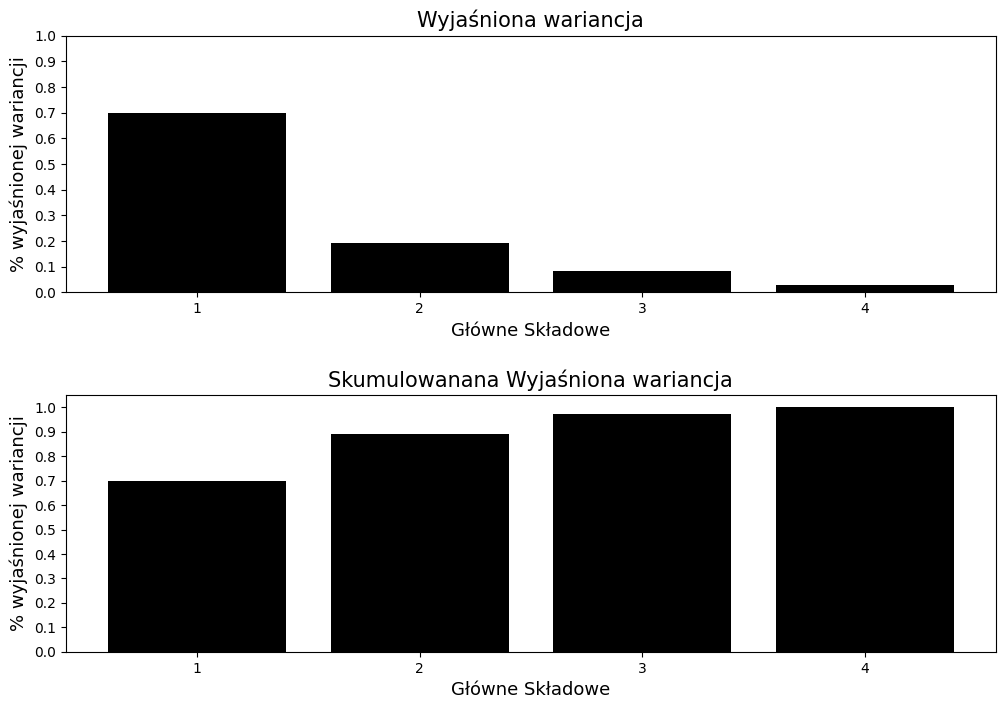

Główna składowa: 1, Wyjaśniona wariancja: 0.69963, Skumulowana Wyjaśniona wariancja: 0.69963
Główna składowa: 2, Wyjaśniona wariancja: 0.19098, Skumulowana Wyjaśniona wariancja: 0.89061
Główna składowa: 3, Wyjaśniona wariancja: 0.08227, Skumulowana Wyjaśniona wariancja: 0.97288
Główna składowa: 4, Wyjaśniona wariancja: 0.02712, Skumulowana Wyjaśniona wariancja: 1.0


In [69]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

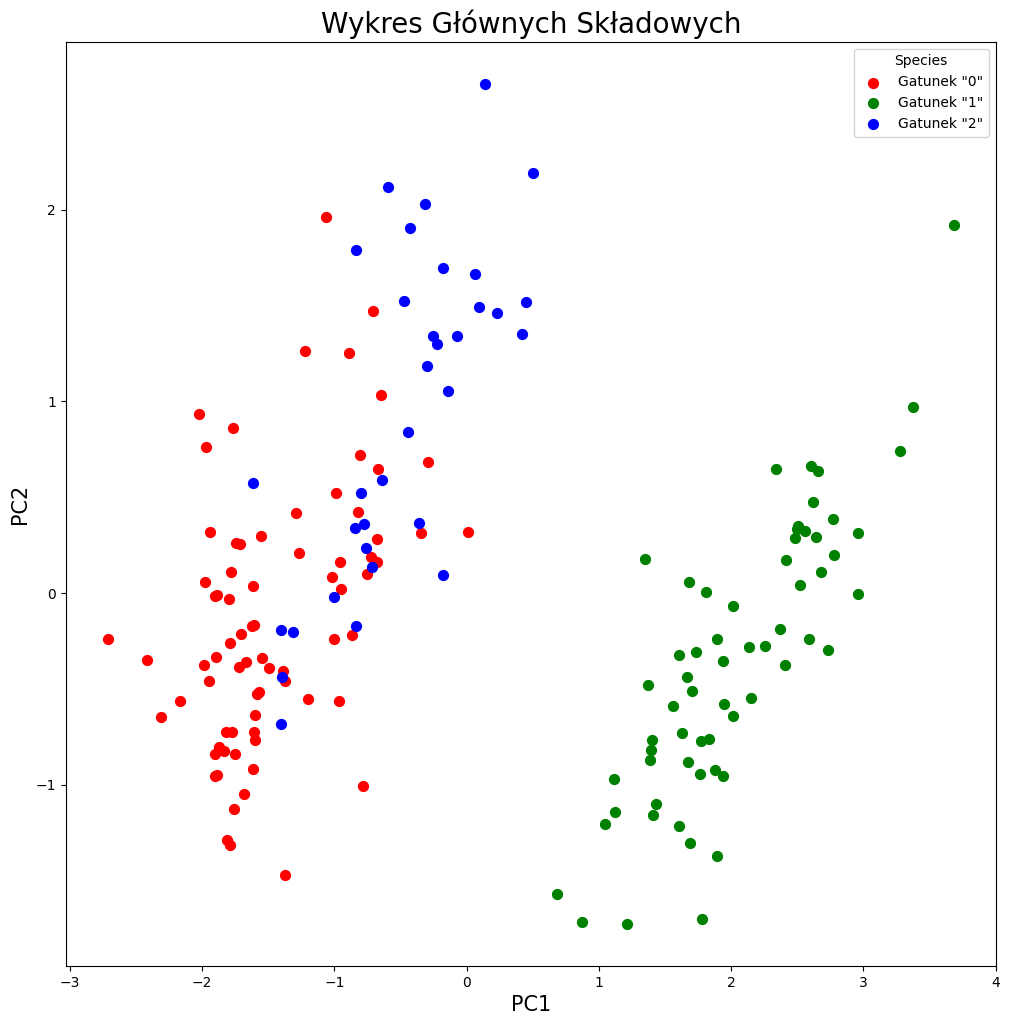

In [70]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguins.loc[train_penguins['Species']==0, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==0,'PC2'],
            c='red', label='Gatunek "0"', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==1, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==1,'PC2'],
            c='green', label='Gatunek "1"', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==2, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==2,'PC2'],
            c='blue', label='Gatunek "2"', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9942   |             28957              |
|   Skalowane dane  |    1.0     |              4136              |
|        4 PC       |    1.0     |              3946              |
|        3 PC       |   0.9942   |              3986              |
|        2 PC       |   0.9181   |              3990              |
|        1 PC       |   0.9298   |              2957              |
+-------------------+------------+--------------------------------+


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_pca = pca.fit_transform(X_train_scaler)
X_train_standardized = X_train_pca[:, :3]
X_test_pca = pca.transform(X_test_scaler)
X_test_standardized = X_test_pca[:, :3]

model_lr = LogisticRegression(max_iter=100000)
model_lr.fit(X_train_pca[:, :3], y_train)

from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      1.00      1.00        61
           2       1.00      0.97      0.99        34

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



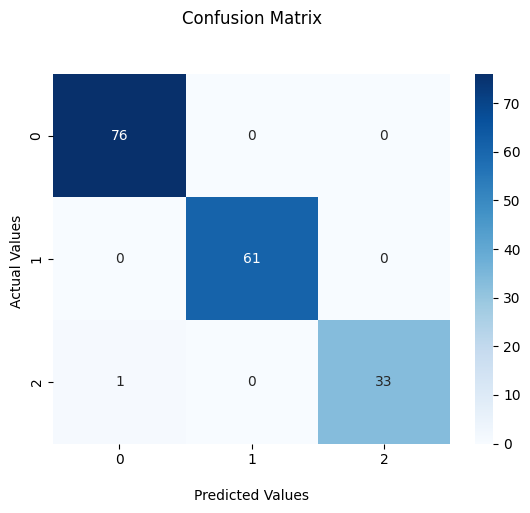

In [79]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_pca[:, :3], y_test)

In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
random_knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [1, 3, 5, 10, 20, 50]}
knn_gridsearch = GridSearchCV(random_knn,
                             params_knn,
                             )
knn_gridsearch.fit(X_train_pca[:, :3], y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
model_knn_v2 = knn_gridsearch.best_estimator_


Best hyperparameter: {'n_neighbors': 3}


In [81]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_pca[:, :3], y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      1.00      1.00        61
           2       1.00      0.97      0.99        34

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



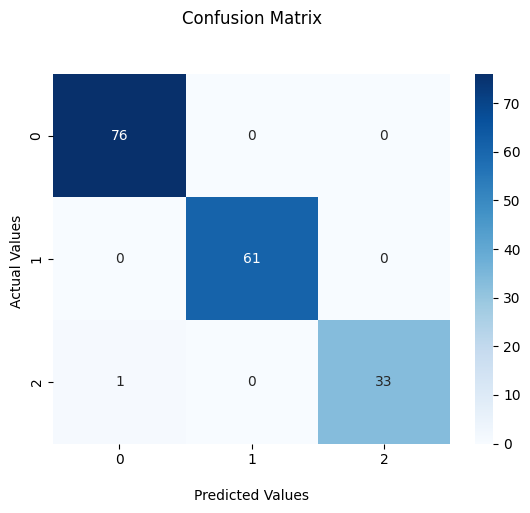

In [82]:
calculate_metrics(model_knn, 'KNN', X_test_pca[:, :3], y_test)

### Drzewo decyzyjne

In [83]:
from sklearn.tree import DecisionTreeClassifier

random_tree = DecisionTreeClassifier()
params_tree = {'max_depth': [1, 2, 3, 5, 10],
                'min_samples_leaf':[1, 3, 5, 10, 20]}
tree_gridsearch = GridSearchCV(random_tree,
                             params_tree,
                             )
tree_gridsearch.fit(X_train_pca[:, :3], y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
model_tree_v2 = tree_gridsearch.best_estimator_


Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 1}


In [84]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
model_tree.fit(X_train_pca[:, :3], y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       0.98      1.00      0.99        61
           2       1.00      0.91      0.95        34

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



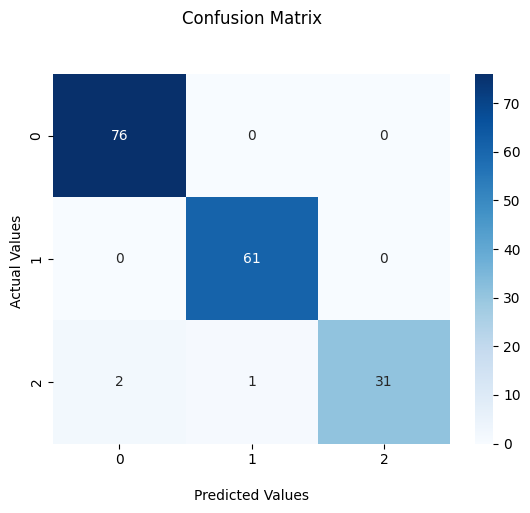

In [85]:
calculate_metrics(model_tree, 'Tree', X_test_pca[:, :3], y_test)

### SVM (Support Vector Machines) - Maszyna wektorów nośnych

In [86]:
from sklearn.svm import SVC

random_svm = SVC(kernel='rbf', probability=True)
params_svm = {'degree': [1, 2, 3, 5, 10],
                'C':[0.1, 0.3, 0.5, 1.0, 1.3, 1.5]}
svm_gridsearch = GridSearchCV(random_svm,
                             params_svm,
                             )
svm_gridsearch.fit(X_train_pca[:, :3], y_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
model_svm_v2 = svm_gridsearch.best_estimator_


Best hyperparameter: {'C': 0.5, 'degree': 1}


In [87]:
model_svm = SVC(C=0.5, kernel='rbf', degree=1, probability=True)
model_svm.fit(X_train_pca[:, :3], y_train)

SVC(C=0.5, degree=1, probability=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       1.00      1.00      1.00        61
           2       0.97      0.97      0.97        34

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



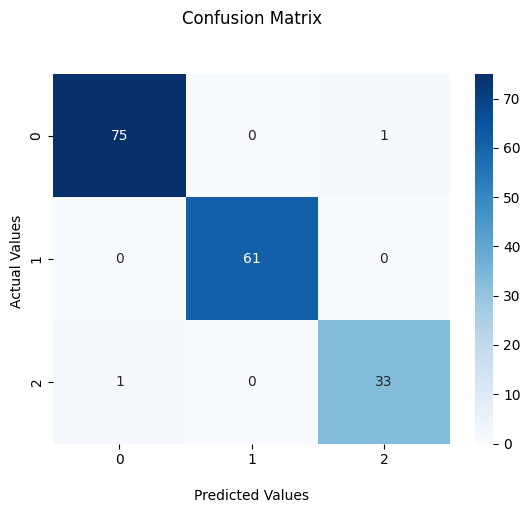

In [88]:
calculate_metrics(model_svm, 'SVM', X_test_pca[:, :3], y_test)

### Random Forest – Las drzew decyzyjnych
### Ilość drzew decyzyjnych w RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier

random_rfc = RandomForestClassifier()
params_rfc = {'n_estimators': [50, 500, 1000, 1500],
                'max_depth': [1, 3, 5],
                'min_samples_leaf':[1, 3, 5, 10]}
rfc_gridsearch = GridSearchCV(random_rfc,
                             params_rfc,
                             )
rfc_gridsearch.fit(X_train_pca[:, :3], y_train)
print('\nBest hyperparameter:', rfc_gridsearch.best_params_)
model_rfc_v2 = rfc_gridsearch.best_estimator_


Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 50}


In [91]:
model_forest = RandomForestClassifier(n_estimators=50, max_depth=3, 
                min_samples_leaf=10)
model_forest.fit(X_train_pca[:, :3], y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=50)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      1.00      1.00        61
           2       1.00      0.88      0.94        34

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171



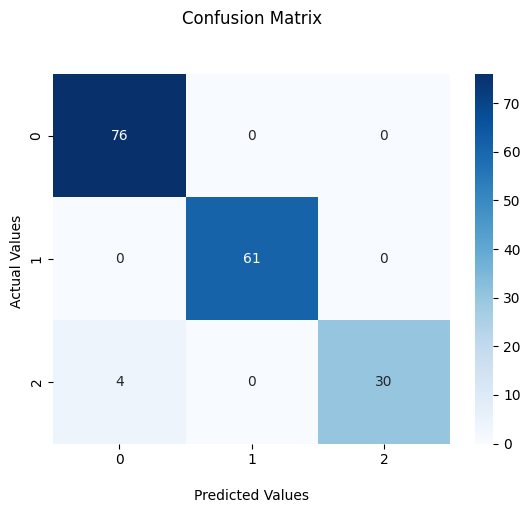

In [92]:
calculate_metrics(model_forest, 'Random Forest', X_test_pca[:, :3], y_test)

### Boosting - AdaBoost

In [90]:
from sklearn.ensemble import AdaBoostClassifier

random_ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))
params_ab = {'n_estimators': [10, 50, 500, 1000],
                'learning_rate':[0.1, 0.3, 0.5, 1.0, 1.3, 1.5]}
ab_gridsearch = GridSearchCV(random_ab,
                             params_ab,
                             )
ab_gridsearch.fit(X_train_pca[:, :3], y_train)
print('\nBest hyperparameter:', ab_gridsearch.best_params_)
model_ab_v2 = ab_gridsearch.best_estimator_


Best hyperparameter: {'learning_rate': 1.3, 'n_estimators': 10}


In [93]:
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                    learning_rate=1.3,n_estimators=10)
model_adaboost.fit(X_train_pca[:, :3], y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.3, n_estimators=10)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.98      1.00      0.99        61
           2       0.97      0.88      0.92        34

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.97      0.97       171



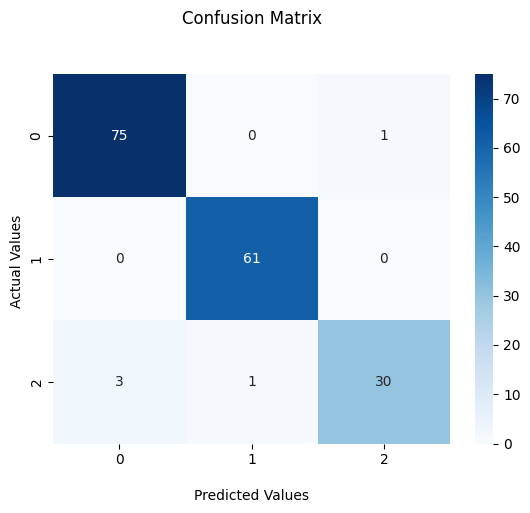

In [94]:
calculate_metrics(model_adaboost, 'AdaBoost test', X_test_pca[:, :3], y_test)

### Ensembling - Zespół klasyfikatorów

In [95]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost),
                                            ('Logistic Regression', model_lr),
                                            ('Knn', model_knn),
                                            ('SVM', model_svm)],
                                voting='soft')

model_voting.fit(X_train_pca[:, :3], y_train)

VotingClassifier(estimators=[('Tree', DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=10,
                                                     n_estimators=50)),
                             ('AdaBoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                 learning_rate=1.3,
                                                 n_estimators=10)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=100000)),
                             ('Knn', KNeighborsClassifier(n_neighbors=3)),
                             ('SVM', SVC(C=0.5, degree=1, probability=True))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      1.00      1.00        61
           2       1.00      0.97      0.99        34

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



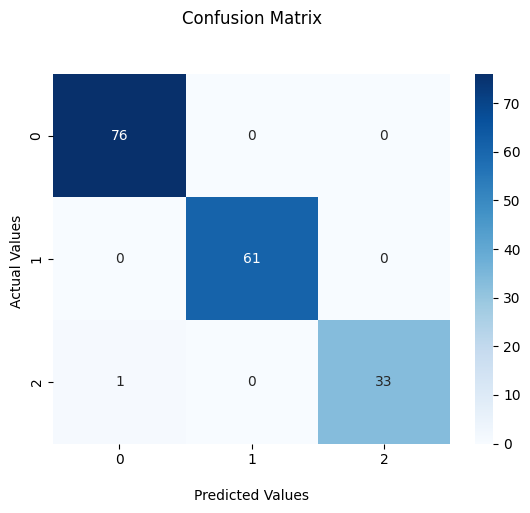

In [96]:
calculate_metrics(model_voting, 'VotingClassifier', X_test_pca[:, :3], y_test)